## Avance 02
En este segundo avance del proyecto correspondiente a las tareas "Descargar datos, limpiar y preprocesar, fusionar datos, crear diccionario de datos" suba como evidencia de sus actividades un archivo comprimido con los siguientes productos de del trabajo en equipo:

Conjunto de datos limpios
Diccionario de datos

In [48]:
import pandas as pd
from matplotlib import pyplot as plt

route = "fuentes/MatriculaPorEntidad.xlsx"

df = pd.read_excel(route)

print(df.head())

         Entidad federativa  Nivel educativo 2000/2001 2000/2001.1  \
0        Entidad federativa  Nivel educativo     Total     Hombres   
1  Estados Unidos Mexicanos            Total  28569473    14528751   
2  Estados Unidos Mexicanos          Inicial        ND          ND   
3  Estados Unidos Mexicanos       Preescolar   3423608     1725370   
4  Estados Unidos Mexicanos         Primaria  14792528     7576000   

  2000/2001.2 2005/2006 2005/2006.1 2005/2006.2 2010/2011 2010/2011.1  ...  \
0     Mujeres     Total     Hombres     Mujeres     Total     Hombres  ...   
1    14040722  31085098    15699403    15385695  32835292    16600199  ...   
2          ND        ND          ND          ND        ND          ND  ...   
3     1698238   4452168     2249084     2203084   4641060     2344421  ...   
4     7216528  14548194     7452791     7095403  14887845     7604864  ...   

  2020/2021.2 2021/2022 2021/2022.1 2021/2022.2 2022/2023 2022/2023.1  \
0     Mujeres     Total     Hombres  

#### Limpieza de datos:

In [49]:
# limpieza de datos: 
# buscar valores nulos:
print(df.info()) # se comprueba que sí hay valores nulos 
filas_con_nulos = df[df.isnull().any(axis=1)]
print(filas_con_nulos)
# Los valores nulos son por notas del documento, se eliminan
df = df.dropna()
print(df.info()) # ya no hay valores nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Entidad federativa  242 non-null    object
 1   Nivel educativo     232 non-null    object
 2   2000/2001           232 non-null    object
 3   2000/2001.1         232 non-null    object
 4   2000/2001.2         232 non-null    object
 5   2005/2006           232 non-null    object
 6   2005/2006.1         232 non-null    object
 7   2005/2006.2         232 non-null    object
 8   2010/2011           232 non-null    object
 9   2010/2011.1         232 non-null    object
 10  2010/2011.2         232 non-null    object
 11  2015/2016           232 non-null    object
 12  2015/2016.1         232 non-null    object
 13  2015/2016.2         232 non-null    object
 14  2020/2021           232 non-null    object
 15  2020/2021.1         232 non-null    object
 16  2020/2021.2         232 no

In [50]:
# Eliminación de columnas que no se usarán, nuestra investigación será del año 2015 en adelante:
df = df.drop(df.columns[[2, 3, 4, 5, 6, 7, 8, 9, 10]], axis=1)
print(df.head())

         Entidad federativa  Nivel educativo 2015/2016 2015/2016.1  \
0        Entidad federativa  Nivel educativo     Total     Hombres   
1  Estados Unidos Mexicanos            Total  34531661    17484170   
2  Estados Unidos Mexicanos          Inicial        ND          ND   
3  Estados Unidos Mexicanos       Preescolar   4811966     2430962   
4  Estados Unidos Mexicanos         Primaria  14250425     7265887   

  2015/2016.2 2020/2021 2020/2021.1 2020/2021.2 2021/2022 2021/2022.1  \
0     Mujeres     Total     Hombres     Mujeres     Total     Hombres   
1    17047491  33612855    16826947    16785908  32979551    16418226   
2          ND    196861      100691       96170    190740       98088   
3     2381004   4328188     2182537     2145651   4153558     2090597   
4     6984538  13677465     6955332     6722133  13464469     6843193   

  2021/2022.2 2022/2023 2022/2023.1 2022/2023.2 2023/2024 2023/2024.1  \
0     Mujeres     Total     Hombres     Mujeres     Total     Hombr

#### Preprocesado de datos:

In [51]:
# Preprocesado de datos
# Hay dos filas de "encabezado", es necesario eliminar una y cambiar el nombre para tener encabezados correctos:
# Cambiar nombres de columnas:

df.columns=['entidad_federativa', 'nivel_educativo','2015-2016_total', '2015-2016_hombres', '2015-2016_mujeres',
              														'2020-2021_total', '2020-2021_hombres', '2020-2021_mujeres',
              														'2021-2022_total', '2021-2022_hombres', '2021-2022_mujeres',
              														'2022-2023_total', '2022-2023_hombres', '2022-2023_mujeres',
              														'2023-2024_total', '2023-2024_hombres', '2023-2024_mujeres']

# Eliminar primera fila (anterior encabezado)
df = df.drop(index=0)
print(df.head())



         entidad_federativa nivel_educativo 2015-2016_total 2015-2016_hombres  \
1  Estados Unidos Mexicanos           Total        34531661          17484170   
2  Estados Unidos Mexicanos         Inicial              ND                ND   
3  Estados Unidos Mexicanos      Preescolar         4811966           2430962   
4  Estados Unidos Mexicanos        Primaria        14250425           7265887   
5  Estados Unidos Mexicanos      Secundaria         6835245           3454409   

  2015-2016_mujeres 2020-2021_total 2020-2021_hombres 2020-2021_mujeres  \
1          17047491        33612855          16826947          16785908   
2                ND          196861            100691             96170   
3           2381004         4328188           2182537           2145651   
4           6984538        13677465           6955332           6722133   
5           3380836         6394720           3220968           3173752   

  2021-2022_total 2021-2022_hombres 2021-2022_mujeres 2022-202

In [52]:
# Cambiar todos los ND a -1, no se deben borrar porque algunas columnas si tienen información util, así que se pondrá un indicador de -1
# para indicar que es información no disponible y no tomarla en cuenta en etapas posteriores
df = df.replace("ND", -1)

print(df.head())

# al hacer este cambio tambien se actualizan los tipos de datos:
print(df.info())


         entidad_federativa nivel_educativo  2015-2016_total  \
1  Estados Unidos Mexicanos           Total         34531661   
2  Estados Unidos Mexicanos         Inicial               -1   
3  Estados Unidos Mexicanos      Preescolar          4811966   
4  Estados Unidos Mexicanos        Primaria         14250425   
5  Estados Unidos Mexicanos      Secundaria          6835245   

   2015-2016_hombres  2015-2016_mujeres  2020-2021_total  2020-2021_hombres  \
1           17484170           17047491         33612855           16826947   
2                 -1                 -1           196861             100691   
3            2430962            2381004          4328188            2182537   
4            7265887            6984538         13677465            6955332   
5            3454409            3380836          6394720            3220968   

   2020-2021_mujeres  2021-2022_total  2021-2022_hombres  2021-2022_mujeres  \
1           16785908         32979551           16418226     

C:\Users\Jaime\AppData\Local\Temp\ipykernel_24616\4198576235.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("ND", -1)


In [53]:
# Exportación a nuevo csv:
df.to_csv("resultados/MatriculaPorEntidad.csv", index=None)

In [54]:
#Diccionario
dic_col = ['variables', 'tipo_dato', 'descripcion'] #Las columnas del diccionario
column_headers = list(df.columns) #lista de las columnas de los datos
column_types = df.dtypes.astype(str).tolist() #lista de los tipos de datos de las columnas
column_desc = ["Estados que conforman la entidad Federativa de los Estados Unidos Mexicanos",
               "Nivel Educativo del que se está realizando la evaluación (Primaria, Secundaria, Media Superior, Superior) además del valor total e inicial",
					"Datos del ciclo escolar 2015 y 2016 totales",
					"Datos del ciclo escolar 2015 y 2016 para hombres",
					"Datos del ciclo escolar 2015 y 2016 para mujeres",
               "Datos del ciclo escolar 2020 y 2021 totales",
               "Datos del ciclo escolar 2020 y 2021 para hombres",
               "Datos del ciclo escolar 2020 y 2021 para mujeres",
      		   "Datos del ciclo escolar 2021 y 2022 totales",
      		   "Datos del ciclo escolar 2021 y 2022 para hombres",
      		   "Datos del ciclo escolar 2021 y 2022 para mujeres",
		         "Datos del ciclo escolar 2022 y 2023 totales",
		         "Datos del ciclo escolar 2022 y 2023 para hombres",
		         "Datos del ciclo escolar 2022 y 2023 para mujeres",
               "Datos del ciclo escolar 2023 y 2024 totales",
               "Datos del ciclo escolar 2023 y 2024 para hombres",
               "Datos del ciclo escolar 2023 y 2024 para mujeres"] 




diccionario = pd.DataFrame({
    dic_col[0]: column_headers,
    dic_col[1]: column_types,
    dic_col[2]: column_desc
})
#diccionario.head(10)
diccionario.to_excel('resultados/MatriculaPorEntidadDicc.xlsx', index=False)

In [55]:
display(df)

,entidad_federativa,nivel_educativo,2015-2016_total,2015-2016_hombres,2015-2016_mujeres,2020-2021_total,2020-2021_hombres,2020-2021_mujeres,2021-2022_total,2021-2022_hombres,2021-2022_mujeres,2022-2023_total,2022-2023_hombres,2022-2023_mujeres,2023-2024_total,2023-2024_hombres,2023-2024_mujeres
1,Estados Unidos Mexicanos,Total,34531661,17484170,17047491,33612855,16826947,16785908,32979551,16418226,16561325,33145240,16513323,16631917,33062447,16471800,16590647
2,Estados Unidos Mexicanos,Inicial,-1,-1,-1,196861,100691,96170,190740,98088,92652,217391,112127,105264,225404,116420,108984
3,Estados Unidos Mexicanos,Preescolar,4811966,2430962,2381004,4328188,2182537,2145651,4153558,2090597,2062961,4334938,2179034,2155904,4243279,2133580,2109699
4,Estados Unidos Mexicanos,Primaria,14250425,7265887,6984538,13677465,6955332,6722133,13464469,6843193,6621276,13345969,6779902,6566067,13154354,6680355,6473999
5,Estados Unidos Mexicanos,Secundaria,6835245,3454409,3380836,6394720,3220968,3173752,6305013,3169182,3135831,6210924,3119827,3091097,6284377,3166930,3117447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Zacatecas,Preescolar,75806,38114,37692,73526,37127,36399,69950,35051,34899,70035,35028,35007,68198,34210,33988
228,Zacatecas,Primaria,196740,100534,96206,197572,99793,97779,194700,98622,96078,193349,97872,95477,190204,96367,93837
229,Zacatecas,Secundaria,95265,47809,47456,89335,45253,44082,87812,44136,43676,88046,44066,43980,89195,44423,44772
230,Zacatecas,Media superior,64459,31362,33097,62703,28963,33740,60619,27538,33081,63589,29323,34266,64332,29916,34416


[34531661, 33612855, 32979551, 33145240, 33062447]


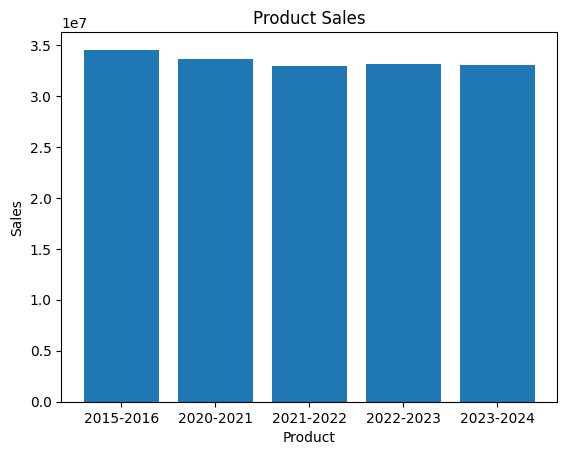

In [ ]:
dfTotales = df[['entidad_federativa', 'nivel_educativo', '2015-2016_total', '2020-2021_total', '2021-2022_total', '2022-2023_total', '2023-2024_total']]

dfTotales = dfTotales[dfTotales["nivel_educativo"] == "Total"]
# display(dfTotales)

periodos = ['2015-2016', '2020-2021', '2021-2022', '2022-2023', '2023-2024']
fila_uno = dfTotales.iloc[0].tolist()


fila_uno.pop(0)
fila_uno.pop(0)
fila_uno = [int(valor) for valor in fila_uno]

print(fila_uno)

plt.bar(periodos, fila_uno)
plt.title('Matriculas por periodo en méxico')
plt.xlabel('Periodo escolar')
plt.ylabel('Matriculas')
plt.show()